Chapter 02

# 缺失值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

## 可视化鸢尾花数据

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


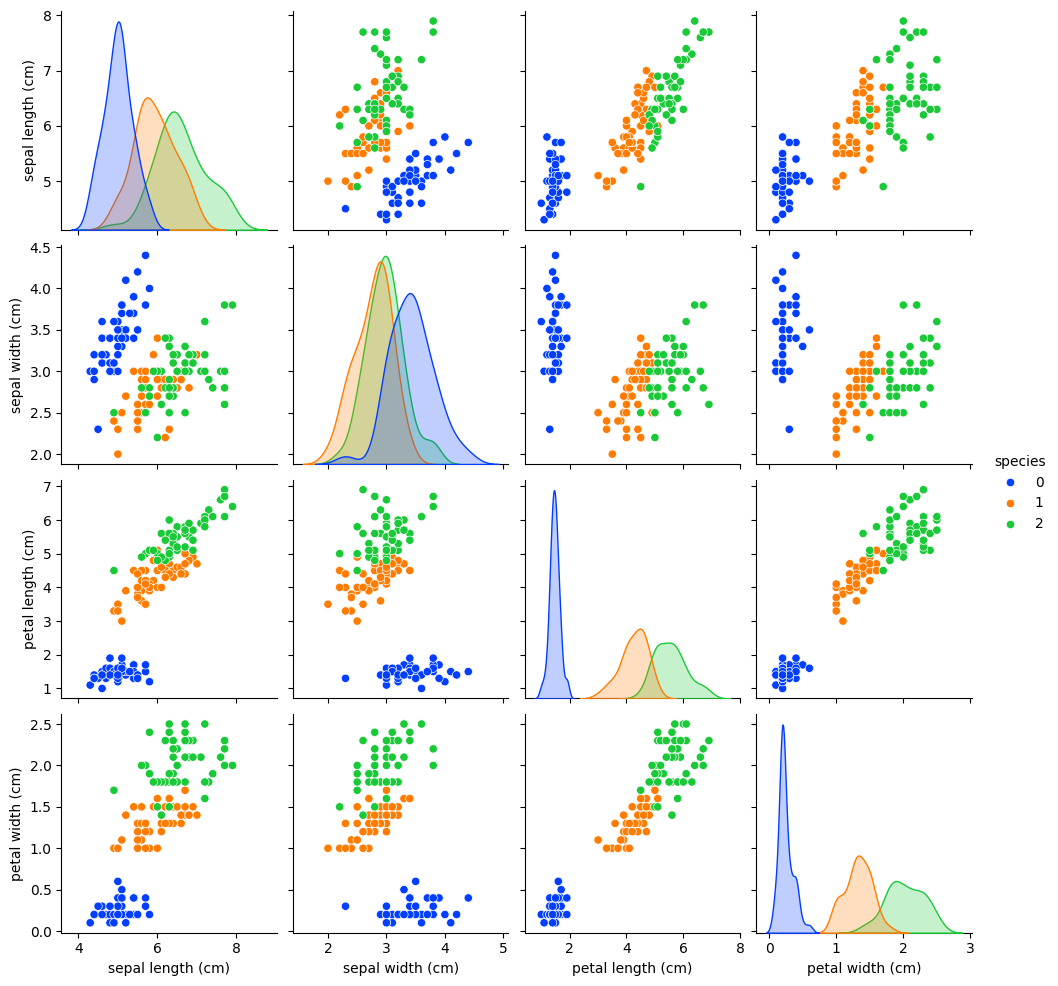

In [3]:
iris_df = X.copy()
iris_df['species'] = y
sns.pairplot(iris_df, hue='species', palette = "bright")

## 随机引入缺失值缺失值

In [4]:
X_NaN = X.copy()

mask = np.random.uniform(0,1,size = X_NaN.shape)

mask = (mask <= 0.4)

X_NaN[mask] = np.NaN
print(X_NaN.tail)

<bound method NDFrame.tail of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               NaN                1.4               NaN
1                  NaN               3.0                NaN               NaN
2                  4.7               3.2                NaN               0.2
3                  NaN               NaN                NaN               0.2
4                  5.0               NaN                1.4               0.2
..                 ...               ...                ...               ...
145                NaN               NaN                5.2               2.3
146                6.3               NaN                5.0               1.9
147                NaN               NaN                5.2               2.0
148                NaN               3.4                5.4               NaN
149                NaN               NaN                5.1               1.8

[150 rows x 4 columns]>


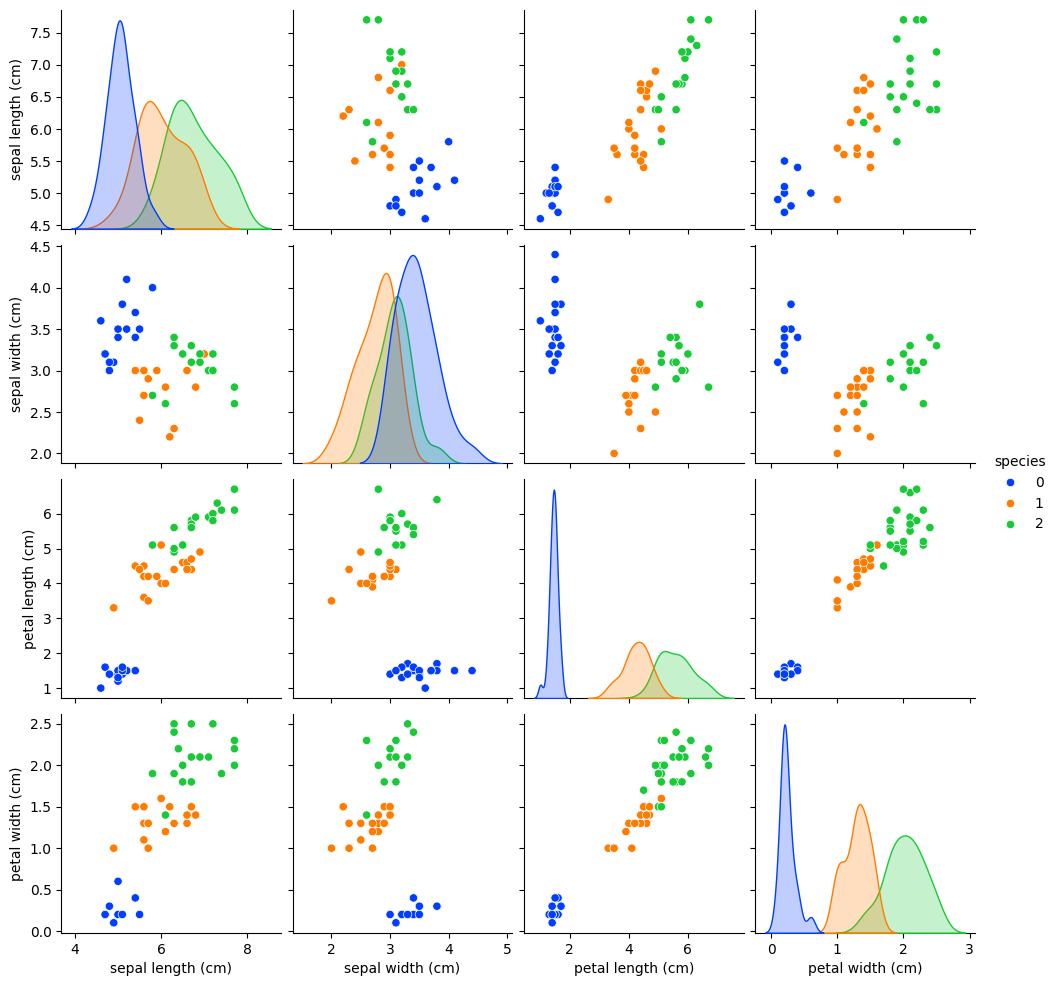

In [5]:
iris_df_NaN = X_NaN.copy()
iris_df_NaN['species'] = y
sns.pairplot(iris_df_NaN, hue='species', palette = "bright")

## 可视化缺失值

In [6]:
# 用isna()方法查找缺失值
is_NaN = iris_df_NaN.isna()
# print(is_NaN)

<Axes: >

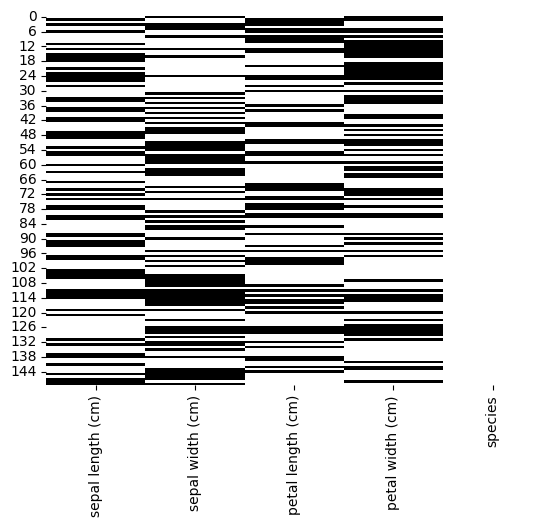

In [7]:
fig, ax = plt.subplots()
sns.heatmap(is_NaN,
            ax = ax,
            cmap='gray_r',
            cbar=False)

In [8]:
not_NaN = iris_df_NaN.notna()
# sum_rows = not_NaN.sum(axis=1)
# print(not_NaN)

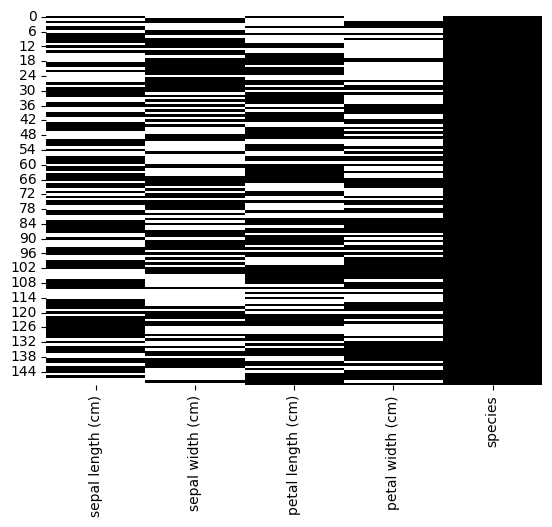

In [9]:
fig, ax = plt.subplots()
ax = sns.heatmap(not_NaN,
                 cmap='gray_r',
                 cbar=False)

<Axes: >

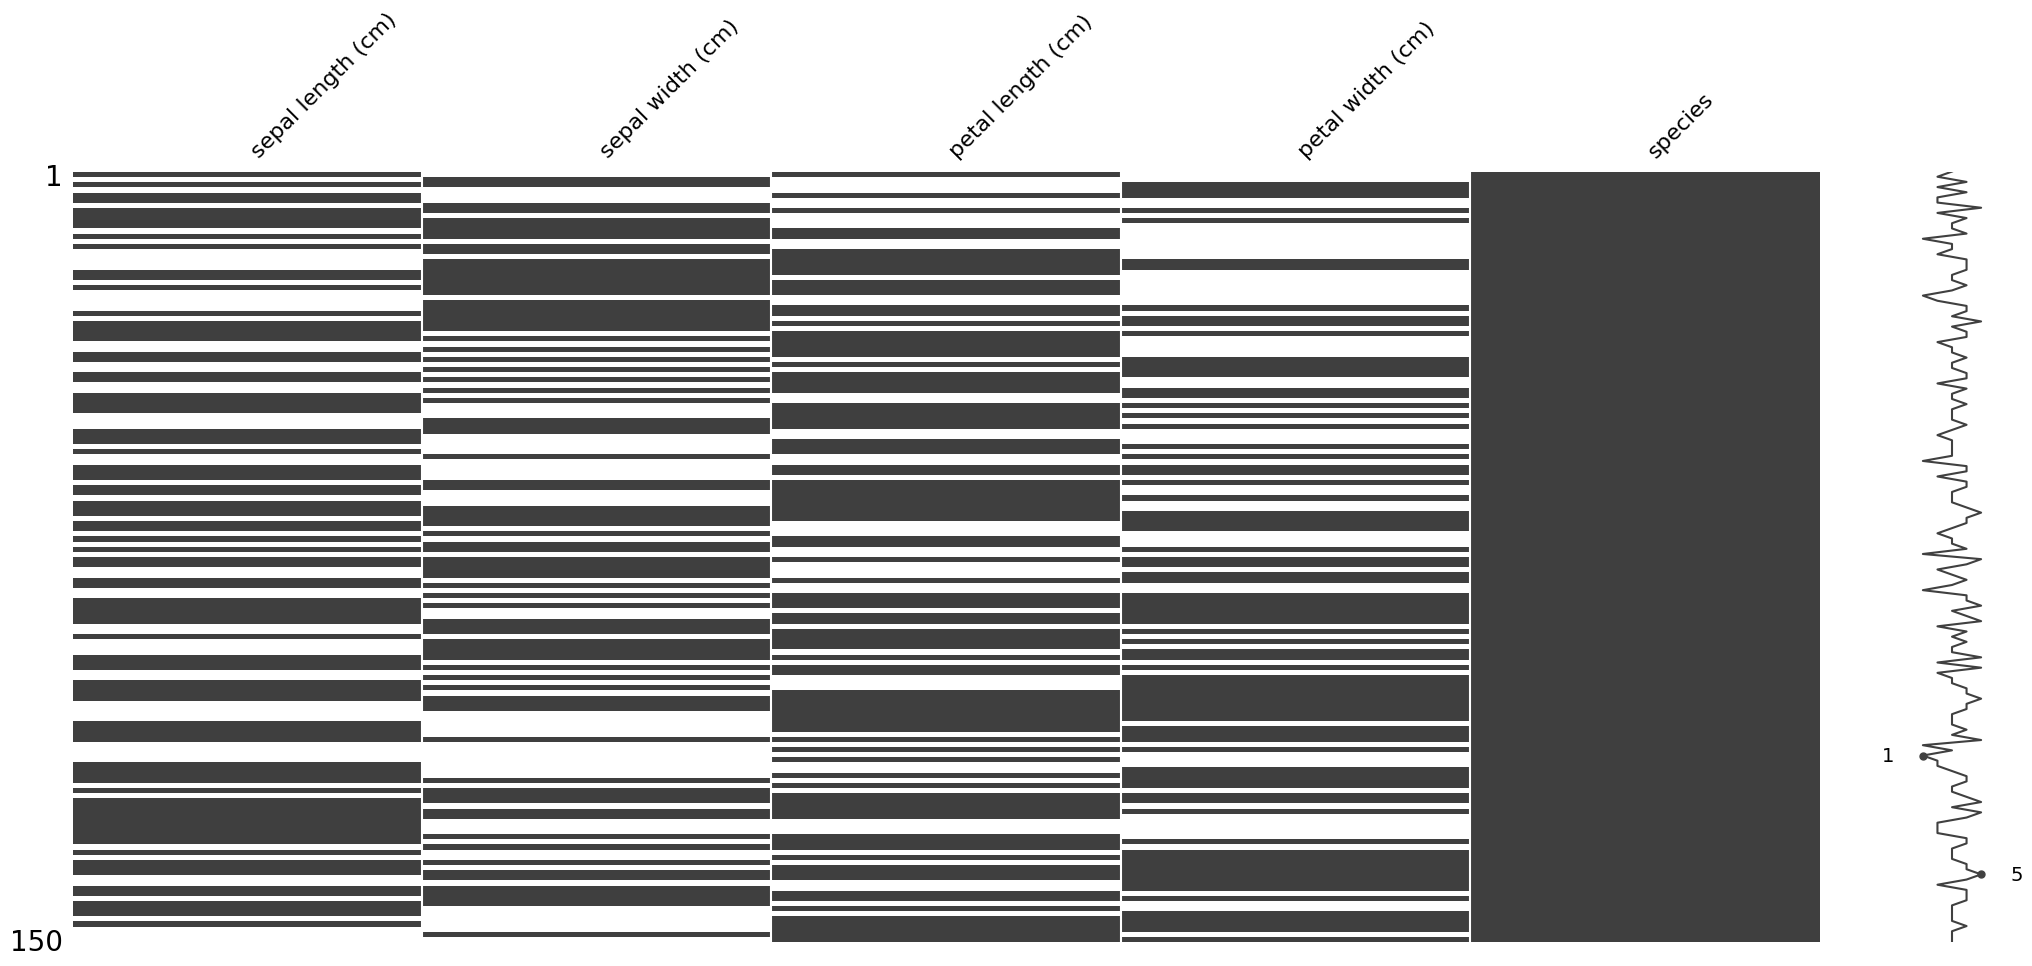

In [10]:
import missingno as msno
# missingno has to be installed first
# pip install missingno

msno.matrix(iris_df_NaN)

In [11]:
# 总结缺失值

print("\nCount total NaN at each column:\n",
      X_NaN.isnull().sum())

print("\nPercentage of NaN at each column:\n",
      X_NaN.isnull().sum()/len(X_NaN)*100)


Count total NaN at each column:
 sepal length (cm)    63
sepal width (cm)     70
petal length (cm)    57
petal width (cm)     69
dtype: int64

Percentage of NaN at each column:
 sepal length (cm)    42.000000
sepal width (cm)     46.666667
petal length (cm)    38.000000
petal width (cm)     46.000000
dtype: float64


## 删除含有缺失值的行

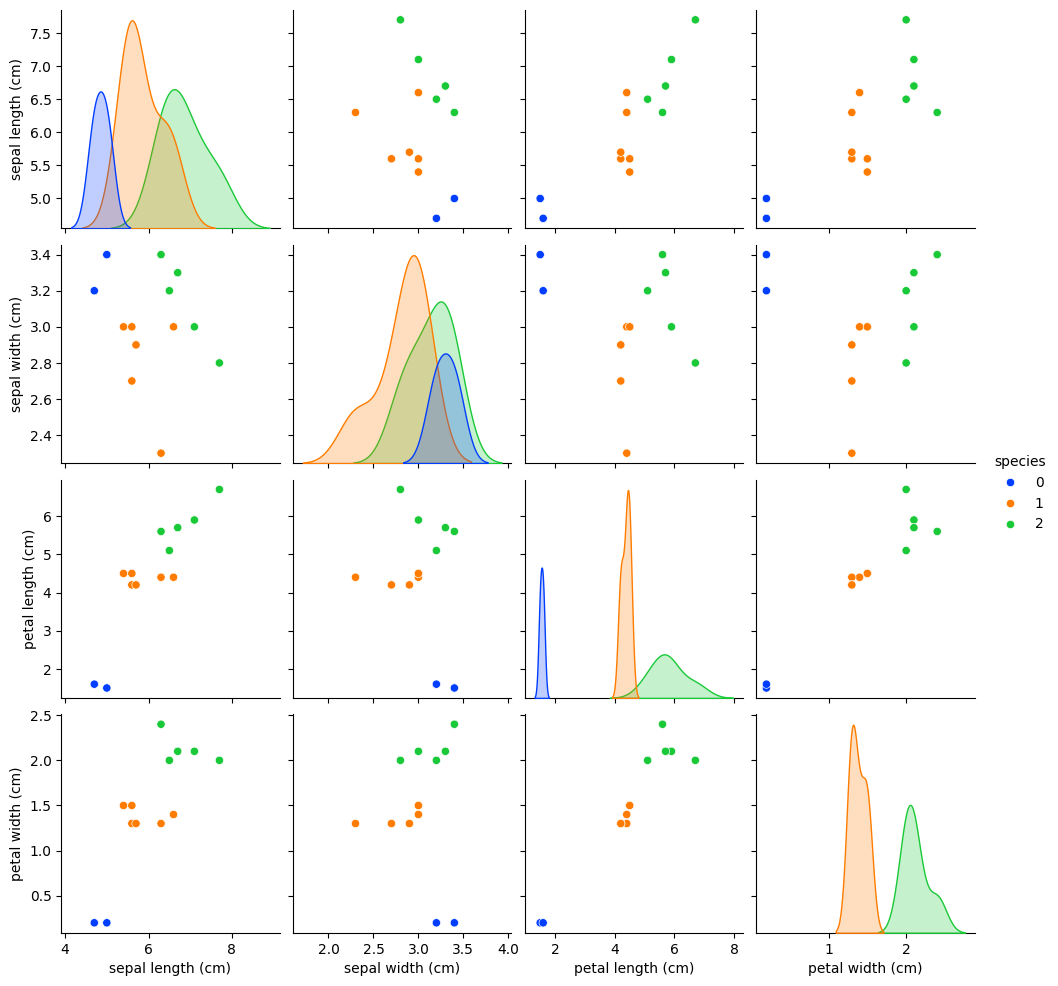

In [12]:
#%% drop missing value rows

X_NaN_drop = X_NaN.dropna(axis=0)

iris_df_NaN_drop = pd.DataFrame(X_NaN_drop, columns=X_NaN.columns, index=X_NaN.index)
iris_df_NaN_drop['species'] = y
sns.pairplot(iris_df_NaN_drop, hue='species', palette = "bright")

#%% imputing the data using median imputation

## 单变量插补

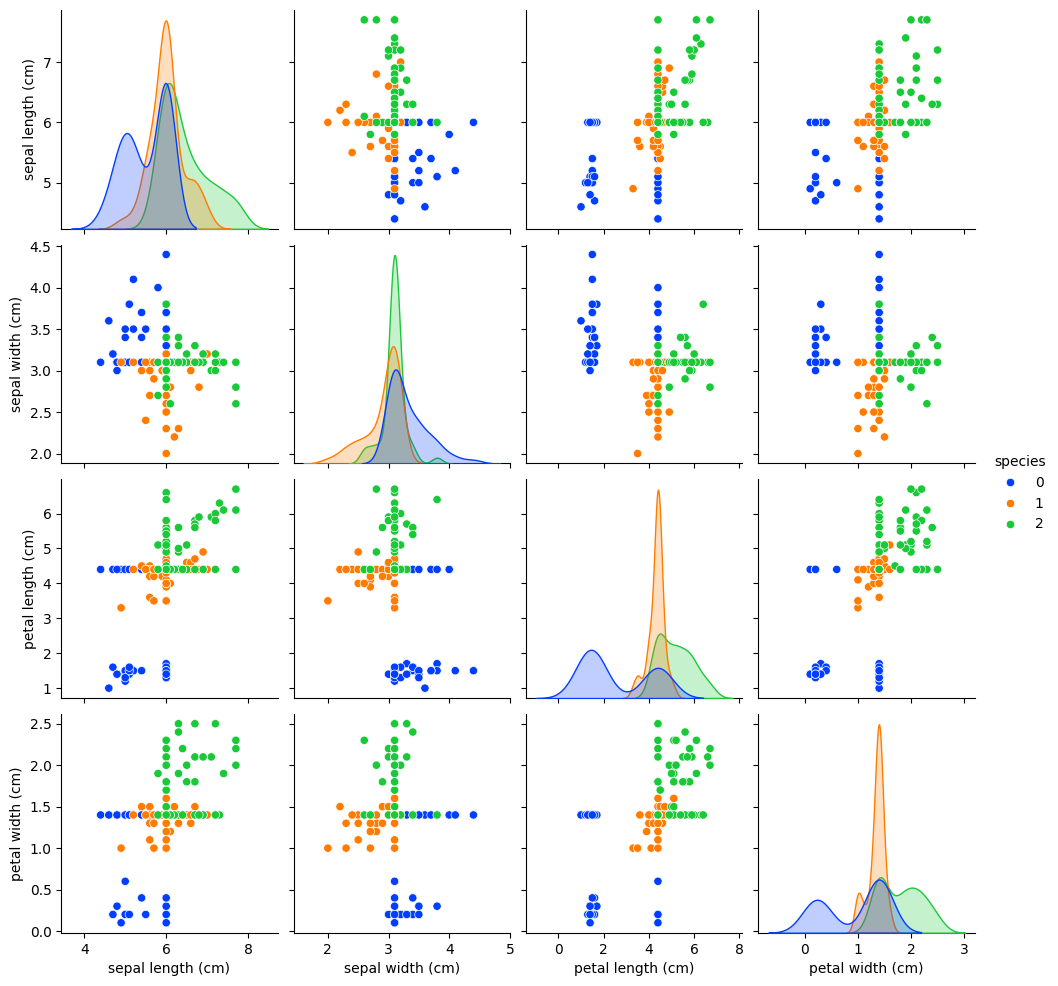

In [13]:
from sklearn.impute import SimpleImputer

# The imputation strategy:
# 'mean', replace missing values using the mean along each column
# 'median', replace missing values using the median along each column
# 'most_frequent', replace missing using the most frequent value along each column
# 'constant', replace missing values with fill_value

si = SimpleImputer(strategy='median')
# impute training data
X_NaN_median = si.fit_transform(X_NaN)

iris_df_NaN_median = pd.DataFrame(X_NaN_median, 
                                  columns=X_NaN.columns, 
                                  index=X_NaN.index)

iris_df_NaN_median['species'] = y
sns.pairplot(iris_df_NaN_median, hue='species', palette = "bright")

## kNN插补

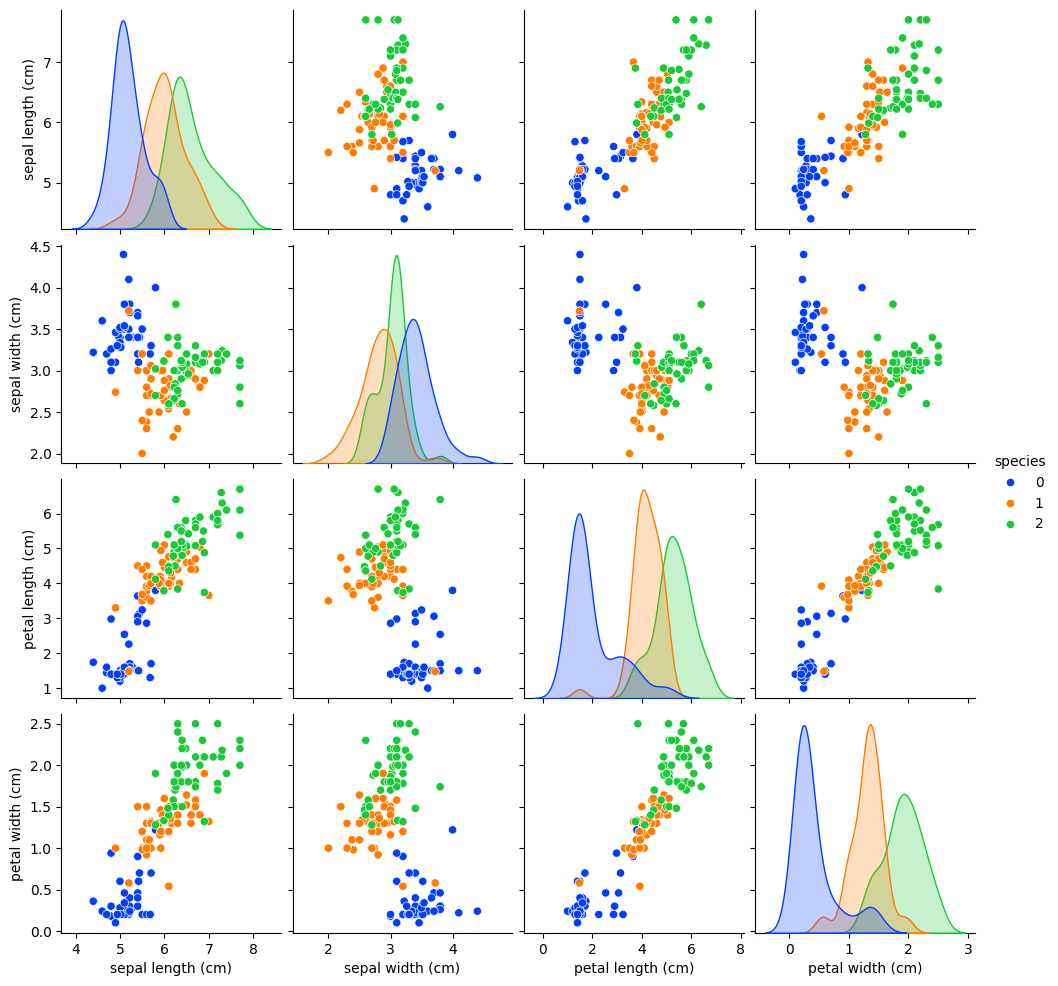

In [14]:
#%% kNN imputation
# kNN, k nearest neighbours

from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors=5) 
X_NaN_kNN = knni.fit_transform(X_NaN)

iris_df_NaN_kNN = pd.DataFrame(X_NaN_kNN, 
                               columns=X_NaN.columns, 
                               index=X_NaN.index)
iris_df_NaN_kNN['species'] = y

sns.pairplot(iris_df_NaN_kNN, 
             hue='species', palette = "bright")

## 多变量插补

C:\Users\james\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


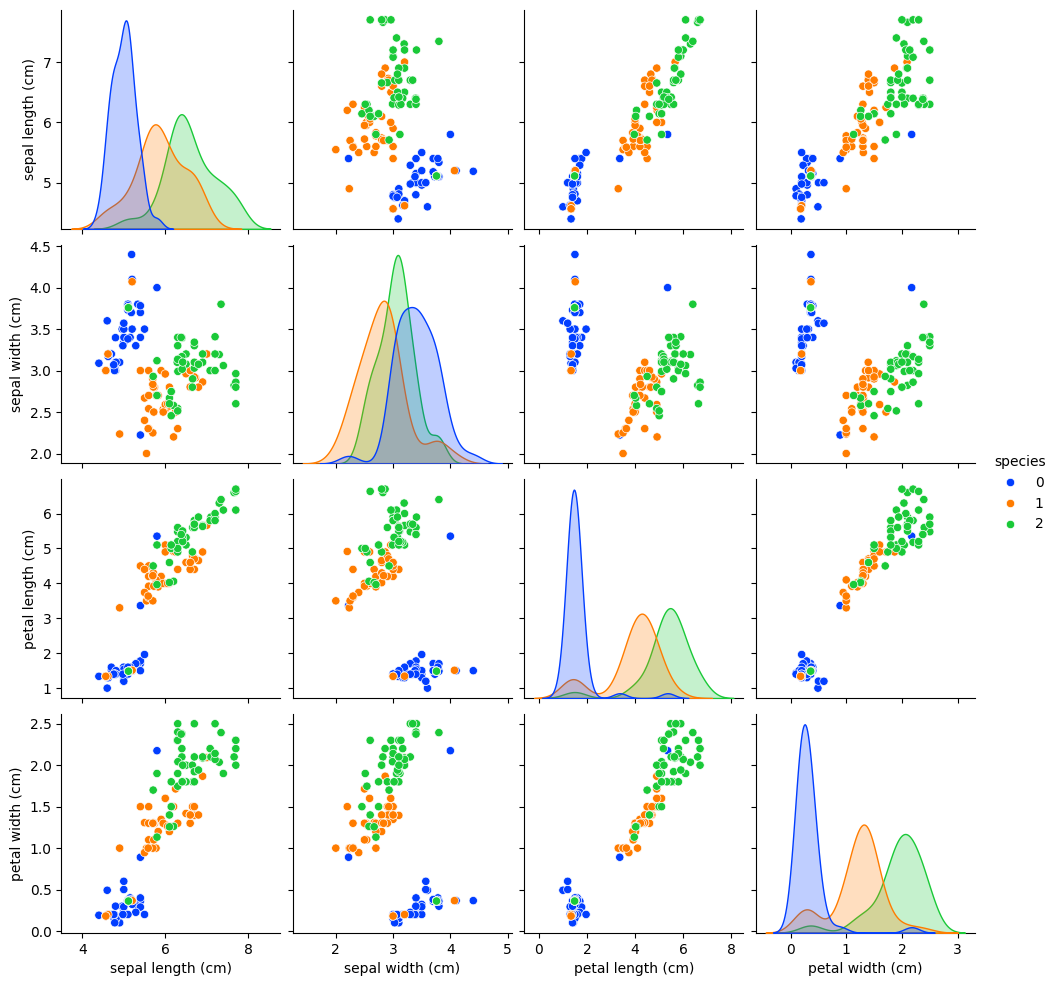

In [15]:
#%% iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

rf_imp = IterativeImputer(estimator=
                          RandomForestRegressor(random_state=0), 
                          max_iter=20)
X_NaN_RF = rf_imp.fit_transform(X_NaN)

iris_df_NaN_RF = pd.DataFrame(X_NaN_RF, 
                              columns=X_NaN.columns, 
                              index=X_NaN.index)
iris_df_NaN_RF['species'] = y
sns.pairplot(iris_df_NaN_RF, hue='species', 
             palette = "bright")